# Graphics and duration calculation using old and new format

In [1]:
import os
import glob
import mne
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import clevercsv
import json

#data_root = ''
data_root = 'Canomed_NewFormat_20sections/STR4/'

Usefull functions to be use adaption time format 

In [2]:
def time2time(timein):
    return '{:02d}:{:02d}'.format(*divmod(timein, 60))

def time_str2float(in_date):
    return float(in_date.replace(':','.'))

def duration_MaskOnOff(mask_on, mask_off):
    init = time2time(int(mask_on))
    finit = time2time(int(mask_off))
    if int(finit.split(':')[0])>12:
        finitfinal = f'{int(finit.split(":")[0])-12}:{int(finit.split(":")[1])}'
    else:
        finitfinal = 'Not midnight passed'
        
    duration = datetime.datetime.strptime(finit, "%H:%M") - datetime.datetime.strptime(init, "%H:%M")
    print(f'from {init} to {finit} ---> {finitfinal} am')
    print(f'duration {duration}')

## DATAFRAME CREATION

In [3]:
# here is the name of each field organized with the unit limits
fields = pd.read_csv(f'{data_root}/STR_signals.txt')

# read the STR resumee edf file converted with edf2ascii.exe
data = pd.read_csv(f'{data_root}/STR_data.txt')
data.dropna(inplace=True)
data_str_f = data.copy()
data_str_f.drop(columns='Time', inplace= True)

# update the column name
colum_names =[]
for element in fields['Label'].values.tolist():
    colum_names.append(element.strip())
    
data_str_f.columns=colum_names

# add human readable date format 
time_ref = datetime.datetime(1970,1,1)
date = []
for element in data_str_f['Date'].tolist():
    date.append((time_ref+datetime.timedelta(days=element)).isoformat().split('T')[0])

data_str_f.insert(1, 'R_Date', date, True)

In [4]:
data_str_f[['Date', 'R_Date', 'MaskOn', 'MaskOff', 'MaskEvents', 'Duration']]

,Date,R_Date,MaskOn,MaskOff,MaskEvents,Duration
0,19887.0,2024-06-13,593.0,640.0,2.0,392.0
20,19888.0,2024-06-14,655.0,982.0,1.0,327.0
40,19889.0,2024-06-15,621.0,1025.0,1.0,404.0
60,19890.0,2024-06-16,626.0,1007.0,1.0,381.0
80,19891.0,2024-06-17,656.0,1010.0,1.0,354.0
100,19892.0,2024-06-18,604.0,1013.0,1.0,409.0
120,19893.0,2024-06-19,632.0,685.0,2.0,390.0
140,19894.0,2024-06-20,567.0,1030.0,1.0,463.0
160,19895.0,2024-06-21,614.0,1022.0,1.0,408.0
180,19896.0,2024-06-22,615.0,695.0,2.0,425.0


# Check the number of hours per section duration etc for one day 

In [9]:
duration_MaskOnOff(655, 982)
duration_MaskOnOff(671, 1016)

from 10:55 to 16:22 ---> 4:22 am
duration 5:27:00
from 11:11 to 16:56 ---> 4:56 am
duration 5:45:00


In [10]:
duration = 327
'{:02d}:{:02d}'.format(*divmod(duration, 60))

'05:27'

In [ ]:
i = 0
for elements in colum_names:
    print(i, elements)
    i=i+1

In [ ]:
#periode = ['2023-10-14','2023-10-17']
#start_periode = data_str.index[data_str['R_Date'] ==periode[0]].tolist() # detect concerned row
#end_periode = data_str.index[data_str['R_Date'] ==periode[1]].tolist() # detect concerned row

# Create donnes synthese for a periode using only STR information

In [7]:
queries_columns = ['Date', 'R_Date', 'MaskOn', 'MaskOff', 'MaskEvents', 'Duration',
                   'AHI', 'HI', 'AI', 'OAI', 'CAI','UAI',
                   'Leak.50', 'Leak.95', 'Leak.Max',  'MaskPress.50', 'MaskPress.95', 'MaskPress.Max']


# create the points to plot and the respective date format
periode = ['2024-06-13','2024-06-27']
id_i=int(data_str_f.index[data_str_f['R_Date']==periode[0]].tolist()[0]/10)
id_f=int(data_str_f.index[data_str_f['R_Date']==periode[1]].tolist()[0]/10)
data_str = data_str_f[queries_columns].iloc[id_i:id_f+1].copy()

Duration = list(map(int, data_str['Duration'].to_list()))
R_Duration =  list(map(time2time, Duration))
R_Duration = list(map(time_str2float, R_Duration))

data_str.insert(4, 'R_Duration', R_Duration, True )
data_str

,Date,R_Date,MaskOn,MaskOff,R_Duration,MaskEvents,Duration,AHI,HI,AI,OAI,CAI,UAI,Leak.50,Leak.95,Leak.Max,MaskPress.50,MaskPress.95,MaskPress.Max
0,19887.0,2024-06-13,593.0,640.0,6.32,2.0,392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.22,0.24,5.74,5.80,5.84
20,19888.0,2024-06-14,655.0,982.0,5.27,1.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.06,0.24,5.72,5.80,5.86
40,19889.0,2024-06-15,621.0,1025.0,6.44,1.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.22,0.44,5.72,5.80,5.90
60,19890.0,2024-06-16,626.0,1007.0,6.21,1.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.24,0.34,5.72,5.80,5.88
80,19891.0,2024-06-17,656.0,1010.0,5.54,1.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.36,0.50,5.70,5.80,5.82
100,19892.0,2024-06-18,604.0,1013.0,6.49,1.0,409.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.26,0.36,5.72,5.80,5.84
120,19893.0,2024-06-19,632.0,685.0,6.30,2.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.16,0.20,5.74,5.80,5.84
140,19894.0,2024-06-20,567.0,1030.0,7.43,1.0,463.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.32,0.64,5.72,5.80,5.86
160,19895.0,2024-06-21,614.0,1022.0,6.48,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.26,0.46,5.70,5.78,5.84
180,19896.0,2024-06-22,615.0,695.0,7.05,2.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.52,0.68,5.70,5.78,5.84


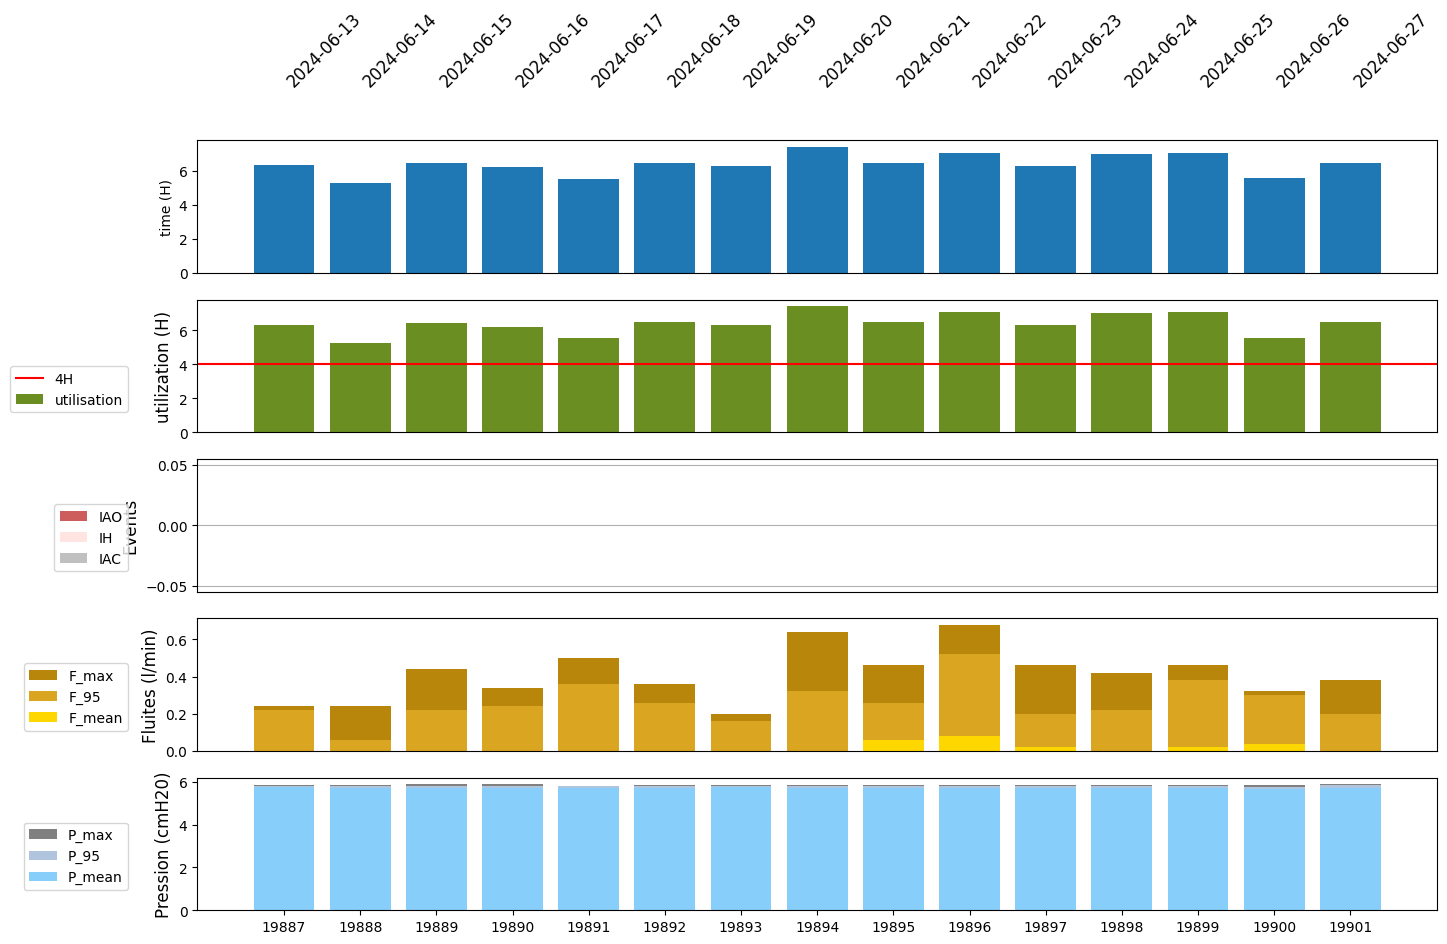

In [8]:
fig, ax = plt.subplots(5,1,figsize=(16,10))

#ax[0].bar(data_str['Date'], data_str['Duration'], bottom=change_time_format(np.array(data_str['Init_time'])))
ax[0].bar(data_str['Date'], data_str['R_Duration'])
#ax[0].set_xticks(data_str['Date'])
ax[0].set_ylabel('time (H)')
#ax[4].set_ylim(0, 32)
#the_ticks = ax[4].get_yticks()
#new_ticks =correc_yticks(the_ticks)
#ax[4].set_yticks(the_ticks, new_ticks)
ax[0].set_xticks([])
#ax[4].grid()

ax[1].bar(data_str['Date'], data_str['R_Duration'], color='olivedrab')
#ax[3].bar(data_str['Date'], data_str['fluites_max']*3, color='lightblue') # invented data[non CRS on EDF or CSV]
ax[1].axhline(y = 4, color = 'r', linestyle = '-') 
ax[1].set_ylabel('utilization (H)',fontsize=12)
ax[1].set_xticks([])
ax[1].legend(["4H", "utilisation", "temp_RCS"], loc="lower right", bbox_to_anchor=(-0.05, 0.1))

ax[4].bar(data_str['Date'], data_str['MaskPress.Max'], color='gray' )
ax[4].bar(data_str['Date'], data_str['MaskPress.95'], color='lightsteelblue' )
ax[4].bar(data_str['Date'], data_str['MaskPress.50'], color='lightskyblue' )
ax[4].set_ylabel('Pression (cmH20)', fontsize=12)
#ax[4].set_xticks([])
ax[4].set_xticks(data_str['Date'])
ax[4].legend(["P_max", "P_95", "P_mean"], loc="lower right",  bbox_to_anchor=(-0.05, 0.1))

ax[3].bar(data_str['Date'], data_str['Leak.Max'], color='darkgoldenrod' )
ax[3].bar(data_str['Date'], data_str['Leak.95'], color='goldenrod' )
ax[3].bar(data_str['Date'], data_str['Leak.50'], color='gold' )
ax[3].set_ylabel('Fluites (l/min)', fontsize=12)
ax[3].set_xticks([])
ax[3].legend(["F_max", "F_95", "F_mean"], loc="lower right", bbox_to_anchor=(-0.05, 0.1))

ax[2].bar(data_str['Date'], data_str['OAI']+data_str['HI']+data_str['CAI'], color='indianred')    # invented data[non IAC on csv]
ax[2].bar(data_str['Date'], data_str['HI']+data_str['CAI'], color='mistyrose')
ax[2].bar(data_str['Date'], data_str['CAI'], color='silver')
ax[2].set_ylabel('Events', fontsize=12)
ax[2].set_xticks([])
ax[2].legend(['IAO', 'IH', 'IAC'], loc="lower right",  bbox_to_anchor=(-0.05, 0.1))
ax[2].grid()

for i in range(len(data_str['R_Date'].unique())):
    ax[0].text(data_str['Date'].unique()[i], 11, data_str['R_Date'].unique()[i], rotation=45, fontsize=12)

#fig.savefig('Graph_synt.png', dpi=1000)

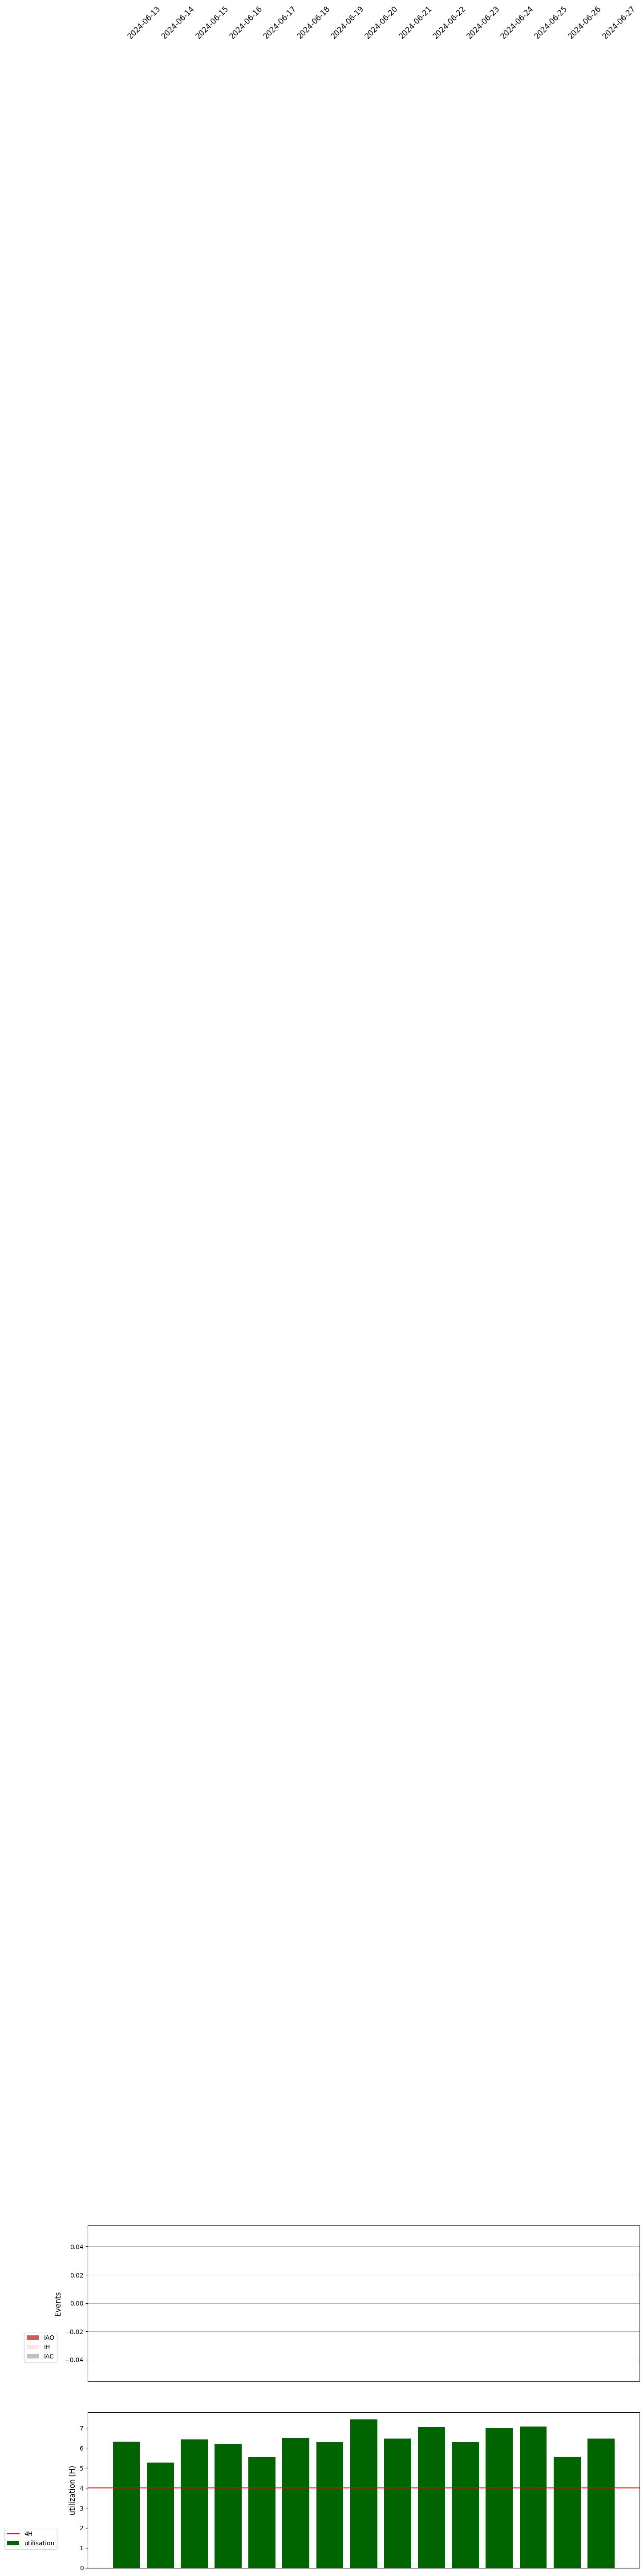

In [11]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

ax[0].bar(data_str['Date'], data_str['OAI']+data_str['HI']+data_str['CAI'], color='indianred')    # invented data[non IAC on csv]
ax[0].bar(data_str['Date'], data_str['HI']+data_str['CAI'], color='mistyrose')
ax[0].bar(data_str['Date'], data_str['CAI'], color='silver')
ax[0].set_ylabel('Events', fontsize=12)
ax[0].set_xticks([])
ax[0].legend(['IAO', 'IH', 'IAC'], loc="lower right",  bbox_to_anchor=(-0.05, 0.1))
ax[0].grid()

ax[1].bar(data_str['Date'], data_str['R_Duration'], color='darkgreen')
#ax[3].bar(data_str['Date'], data_str['fluites_max']*3, color='lightblue') # invented data[non CRS on EDF or CSV]
ax[1].axhline(y = 4, color = 'r', linestyle = '-') 
ax[1].set_ylabel('utilization (H)',fontsize=12)
ax[1].set_xticks([])
ax[1].legend(["4H", "utilisation", "temp_RCS"], loc="lower right", bbox_to_anchor=(-0.05, 0.1))

for i in range(len(data_str['R_Date'].unique())):
    ax[0].text(data_str['Date'].unique()[i], 1.6, data_str['R_Date'].unique()[i], rotation=45, fontsize=12)

In [ ]:
np.mean(data_str['R_Duration'].to_list())

# Working with the EDF file donnes detailles

In [ ]:
folder = '20231001'
#qms_edf = mne.io.read_raw_edf(glob.glob(f'{data_root}/{folder}/*BRP.edf')[0], verbose='error')
ts_edf = mne.io.read_raw_edf(glob.glob(f'{data_root}/{folder}/*PLD.edf')[0], verbose='error')
evt = pd.read_csv(glob.glob(f'{data_root}/{folder}/*EVT.csv')[0], skiprows=[0], sep = ';', names=list('ABCD'))

In [ ]:
#data_edf = mne.io.read_raw_edf(f'{data_root}/STR.edf')
#data_edf.__dict__
#A.mapping.keys()
#A = data_edf.info.items()
#ch_names = A.mapping.get('ch_names')
#nchan = A.mapping.get('nchan') # number of channels
#data_edf.ch_names
#STR = data_edf.get_data()
#df = data_edf.to_data_frame()